# Funkcja klasyfikacji

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np


def score_dataset(x_train, x_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=200, random_state=0)
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    return mean_absolute_error(y_valid, preds)

# Wczytanie danych

In [3]:
import pandas as pd

df = pd.read_csv('melb_data.csv')

# Podział danych

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.7, random_state=42)

# Przechowywanie wyników testów

In [5]:
results = {}

# Brakujace kolumny

In [6]:
missing_values_count = df.isnull().sum().loc[lambda x: x > 0]

print(f'Missing columns:\n{missing_values_count}')

missing_values_percentage = (100 * (df.isnull().sum() / len(df))).round(2)

lack = df.isnull().sum().sum()
not_lack = df.notnull().sum().sum()

d = {lack}

total_number_of_null = pd.DataFrame(d, index=['Total number of null values: '])

missing_values_percentage = pd.concat([missing_values_percentage, total_number_of_null], sort=False)

missing_values_percentage.columns = ['Values']

print(f'Missing columns:\n{missing_values_percentage}')

Missing columns:
Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64
Missing columns:
                                 Values
Suburb                             0.00
Address                            0.00
Rooms                              0.00
Type                               0.00
Price                              0.00
Method                             0.00
SellerG                            0.00
Date                               0.00
Distance                           0.00
Postcode                           0.00
Bedroom2                           0.00
Bathroom                           0.00
Car                                0.46
Landsize                           0.00
BuildingArea                      47.50
YearBuilt                         39.58
CouncilArea                       10.08
Lattitude                          0.00
Longtitude                         0.00
Regionname                         0.00
Propertycount                

# Usunięcie wierszy zawierających przynajmniej 1 element pusty

In [7]:

train_df_cleaned = train_df.copy().dropna()
test_df_cleaned = test_df.copy().dropna()

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Row erased'] = score

187688.98120434958


# Usunięcie kolumn zawierających przynajmniej 1 element pusty

In [8]:
train_df_cleaned = train_df.copy().dropna(axis=1)
test_df_cleaned = test_df.copy().dropna(axis=1)

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Column erased'] = score

196338.8564761354


# Wypełnienie pustych wartości zerami

In [9]:
train_df_cleaned = train_df.copy().fillna(0)
test_df_cleaned = test_df.copy().fillna(0)

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Fill zeros'] = score

188151.4309792938


# Wypełnienie pustych wartości wartością, która poprzedza wartość brakującą

In [10]:
train_df_cleaned = train_df.copy().fillna(method='bfill', axis=0).fillna(0)  # wypełnia wartością poprzedzającą z danej kolumny, jeśli to niemożliwe, wstawia 0
test_df_cleaned = test_df.copy().fillna(method='bfill', axis=0).fillna(0)  # wypełnia wartością poprzedzającą z danej kolumny, jeśli to niemożliwe, wstawia 0

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Fill values before'] = score

/tmp/ipykernel_17143/633143724.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df_cleaned = train_df.copy().fillna(method='bfill', axis=0).fillna(0)  # wypełnia wartością poprzedzającą z danej kolumny, jeśli to niemożliwe, wstawia 0
/tmp/ipykernel_17143/633143724.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df_cleaned = test_df.copy().fillna(method='bfill', axis=0).fillna(0)  # wypełnia wartością poprzedzającą z danej kolumny, jeśli to niemożliwe, wstawia 0


193113.0400968561


# Podstawienie wartości średniej

In [11]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') 
train_df_cleaned = train_df.select_dtypes(include=[np.number]).copy()
test_df_cleaned = test_df.select_dtypes(include=[np.number]).copy()#wybór tylko kolumn przechowujacych liczby, należy wykonać kopię obiektu

train_df_cleaned.loc[:] = imp_mean.fit_transform(train_df_cleaned)  # dopasowanie parametrów (średnich) i transformacja zbioru uczącego
test_df_cleaned[:]  = imp_mean.transform(test_df_cleaned)  # zastosowanie modelu do transformacji zbioru testowego (bez wyznaczania parametrów)

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Fill mean'] = score

187659.41375254226


# Podstawienie wartości mediany

In [12]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median') 
train_df_cleaned = train_df.select_dtypes(include=[np.number]).copy()
test_df_cleaned = test_df.select_dtypes(include=[np.number]).copy()#wybór tylko kolumn przechowujacych liczby, należy wykonać kopię obiektu

train_df_cleaned.loc[:] = imp_median.fit_transform(train_df_cleaned)  # dopasowanie parametrów (średnich) i transformacja zbioru uczącego
test_df_cleaned[:]  = imp_median.transform(test_df_cleaned)  # zastosowanie modelu do transformacji zbioru testowego (bez wyznaczania parametrów)

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Fill median'] = score

188323.4579813501


# Podstawienie wartości mody

In [13]:
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
train_df_cleaned = train_df.select_dtypes(include=[np.number]).copy()
test_df_cleaned = test_df.select_dtypes(include=[np.number]).copy()#wybór tylko kolumn przechowujacych liczby, należy wykonać kopię obiektu

train_df_cleaned.loc[:] = imp_frequent.fit_transform(train_df_cleaned)  # dopasowanie parametrów (średnich) i transformacja zbioru uczącego
test_df_cleaned[:]  = imp_frequent.transform(test_df_cleaned)  # zastosowanie modelu do transformacji zbioru testowego (bez wyznaczania parametrów)

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Fill frequency'] = score

188363.78979876117


In [14]:
for key in results:
    print(f'{key}: {results[key]}')
min_value = min(results, key=results.get)
print(f'Min values\n Type: {min_value}\n Value: {results[min_value]}')



Row erased: 187688.98120434958
Column erased: 196338.8564761354
Fill zeros: 188151.4309792938
Fill values before: 193113.0400968561
Fill mean: 187659.41375254226
Fill median: 188323.4579813501
Fill frequency: 188363.78979876117
Min values
 Type: Fill mean
 Value: 187659.41375254226


In [15]:
# train_df = train_df.copy().dropna()
# test_df = test_df.copy().dropna()

# train_df = train_df.copy()
# test_df = test_df.copy()

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') 
train_df_cleaned = train_df.select_dtypes(include=[np.number]).copy()
test_df_cleaned = test_df.select_dtypes(include=[np.number]).copy()#wybór tylko kolumn przechowujacych liczby, należy wykonać kopię obiektu

train_df_cleaned.loc[:] = imp_mean.fit_transform(train_df_cleaned)  # dopasowanie parametrów (średnich) i transformacja zbioru uczącego
test_df_cleaned[:]  = imp_mean.transform(test_df_cleaned)  # zastosowanie modelu do transformacji zbioru testowego (bez wyznaczania parametrów)

train_df[train_df_cleaned.columns] = train_df_cleaned
test_df[test_df_cleaned.columns] = test_df_cleaned

# Dodatnie dnia tygodnia kiedy nastąpiła sprzedaż

In [16]:
train_df_cleaned = train_df.copy()
test_df_cleaned = test_df.copy()

train_df_cleaned['Day'] = pd.to_datetime(train_df_cleaned['Date'],format="%d/%m/%Y").dt.dayofweek + 1
test_df_cleaned['Day'] = pd.to_datetime(test_df_cleaned['Date'],format="%d/%m/%Y").dt.dayofweek + 1

cols_x = train_df_cleaned.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(train_df_cleaned[cols_x], test_df_cleaned[cols_x], train_df_cleaned[cols_y], test_df_cleaned[cols_y])
print(score)

results['Add week day'] = score

187641.95197682167


1
2
4
6
7


dict_keys([1, 2, 4, 6, 7])

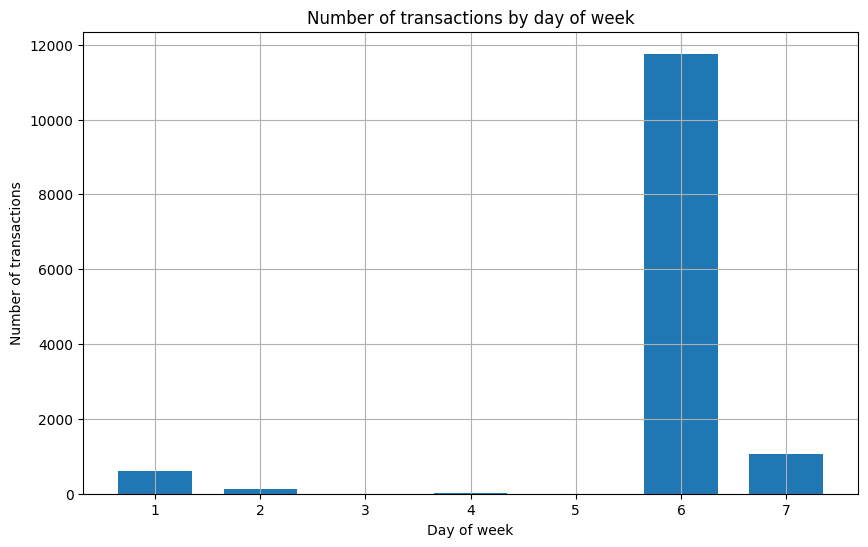

In [17]:
from matplotlib import pyplot as plt
day_of_week = df.copy()

day_of_week['Day'] = pd.to_datetime(day_of_week['Date'],format="%d/%m/%Y").dt.dayofweek + 1

day_of_week = day_of_week.groupby('Day')

data = []

for i, value in enumerate(day_of_week.groups.keys()):
    data.append(len(day_of_week.get_group(value)))
    print(value)

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.7

ax.bar(day_of_week.groups.keys(), data, label='John birth quanity', width=width)
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of transactions')
ax.set_title('Number of transactions by day of week')
ax.grid(True)

day_of_week.groups.keys()

In [18]:
print(df["Regionname"])
df.loc[:, "Regionname"] = df.loc[:, "Regionname"].astype("category")
print(df["Regionname"])

0             Northern Metropolitan
1             Northern Metropolitan
2             Northern Metropolitan
3             Northern Metropolitan
4             Northern Metropolitan
                    ...            
13575    South-Eastern Metropolitan
13576          Western Metropolitan
13577          Western Metropolitan
13578          Western Metropolitan
13579          Western Metropolitan
Name: Regionname, Length: 13580, dtype: object
0             Northern Metropolitan
1             Northern Metropolitan
2             Northern Metropolitan
3             Northern Metropolitan
4             Northern Metropolitan
                    ...            
13575    South-Eastern Metropolitan
13576          Western Metropolitan
13577          Western Metropolitan
13578          Western Metropolitan
13579          Western Metropolitan
Name: Regionname, Length: 13580, dtype: object


In [19]:
categorical_series = pd.Series(["a", "b", "c", "a"], dtype="category")
print(categorical_series)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']


In [20]:
print(len(np.unique(df['Suburb'])))
# zmiana na małe litery
df['Suburb'] = df['Suburb'].str.lower()
print(len(np.unique(df['Suburb'])))
# usunięcie końcowych spacji
df['Suburb'] = df['Suburb'].str.strip()
print(len(np.unique(df['Suburb'])))

314
314
314


# Dodanie nowej cechy (np. CouncilArea) za pomocą LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_train = train_df.copy()
label_test = test_df.copy()

encoder_temp = pd.concat([label_train, label_test])

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
col='CouncilArea'
# label_train[col] = label_encoder.fit_transform(label_train[col])
# label_test[col] = label_encoder.fit_transform(label_test[col])

encoder_temp[col] = label_encoder.fit_transform(encoder_temp[col])

label_train = encoder_temp.iloc[:len(label_train), :]
label_test = encoder_temp.iloc[:len(label_test), :]

cols_x = label_train.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(label_train[cols_x], label_test[cols_x], label_train[cols_y], label_test[cols_y])
print(score)

results['LabelEncoder'] = score

135881.22087516155


# Dodanie nowej cechy (np. CouncilArea) za pomocą BinaryEncoder

In [22]:
from sklearn.preprocessing import LabelBinarizer


# Make copy to avoid changing original data 

label_train = train_df.copy()
label_test = test_df.copy()

encoder_temp = pd.concat([label_train, label_test])

# label_train['CouncilArea'] = label_train['CouncilArea'].astype(str)
# label_test['CouncilArea'] = label_test['CouncilArea'].astype(str)
encoder_temp['CouncilArea'] = encoder_temp['CouncilArea'].astype(str)

label_binarizer = LabelBinarizer()

col = 'CouncilArea'
# lb_results = label_binarizer.fit_transform(label_train[col])
# lb_results_df = pd.DataFrame(lb_results, columns=label_binarizer.classes_)
# label_train = pd.concat([label_train.reset_index(), lb_results_df], axis=1)

# lb_results = label_binarizer.fit_transform(label_test[col])
# lb_results_df = pd.DataFrame(lb_results, columns=label_binarizer.classes_)
# label_test = pd.concat([label_test.reset_index(), lb_results_df], axis=1)

lb_results = label_binarizer.fit_transform(encoder_temp[col])
lb_results_df = pd.DataFrame(lb_results, columns=label_binarizer.classes_)
encoder_temp = pd.concat([encoder_temp.reset_index(), lb_results_df], axis=1)

label_train = encoder_temp.iloc[:len(label_train), :]
label_test = encoder_temp.iloc[:len(label_test), :]

cols_x = label_train.select_dtypes(include=[np.number]).columns.difference(['Price'])  # wybiera tylko kolumny z wartosciami numerycznymi, za wyjątkiem kolumny z wartością referencyjną - wejście do klasyfikatora
cols_y = 'Price'  # - wyjście z klasyfikatora
score = score_dataset(label_train[cols_x], label_test[cols_x], label_train[cols_y], label_test[cols_y])
print(score)

results['LabelBinarizer'] = score

136349.68681464338


In [23]:
for key in results:
    print(f'{key}: {results[key]}')
min_value = min(results, key=results.get)
print(f'Min values:\n Type: {min_value}\n Value: {results[min_value]}')

Row erased: 187688.98120434958
Column erased: 196338.8564761354
Fill zeros: 188151.4309792938
Fill values before: 193113.0400968561
Fill mean: 187659.41375254226
Fill median: 188323.4579813501
Fill frequency: 188363.78979876117
Add week day: 187641.95197682167
LabelEncoder: 135881.22087516155
LabelBinarizer: 136349.68681464338
Min values:
 Type: LabelEncoder
 Value: 135881.22087516155


### Które podejście/podejścia wydają się być najbardziej obiecujące w odniesieniu do estymacji cen nieruchomości (w odniesieniu do uzupełniania braków w poszczególnych kolumnach oraz tworzenia nowych cech bazujących na zmiennych nominalnych?)

podstawową techniką wydaje sie uzupełnienie brakujacych wartości średnią z danej cechy. Pozwala to na zachowanie struktury (nie pozbywamy się próbek) danych bez otrzymania biasu przy uzupełnianiu danych. Również dodanie dodatkowych cech np. poprzez zdyskretyzowanie opisów słownych pozwala na zwiększyc zakres dopasowania dla próbek. Warto eksperymentować z różnymi podejściami i monitorować wydajność modelu na zbiorze walidacyjnym. Kombinacja kilku metod może również przynieść najlepsze rezultaty. 